In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
dir_name_train_100 = 'dataset/training/100'
dir_name_train_200 = 'dataset/training/200'
dir_name_train_50 = 'dataset/training/50'

In [4]:
def plot_images(item_dir, n):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(1, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.axis('off')

In [5]:
def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['total images'] = len(files)
    data['min width'] = 10**100  # No image will be bigger than that
    data['max width'] = 0
    data['min height'] = 10**100  # No image will be bigger than that
    data['max height'] = 0
    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min width'] = min(width, data['min width'])
        data['max width'] = max(width, data['max width'])
        data['min height'] = min(height, data['min height'])
        data['max height'] = max(height, data['max height'])  
    print("Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))


Trainned data for 100:

Images in:  dataset/training/100
total images:	450
min width:	220
max width:	4000
min height:	108
max height:	3000



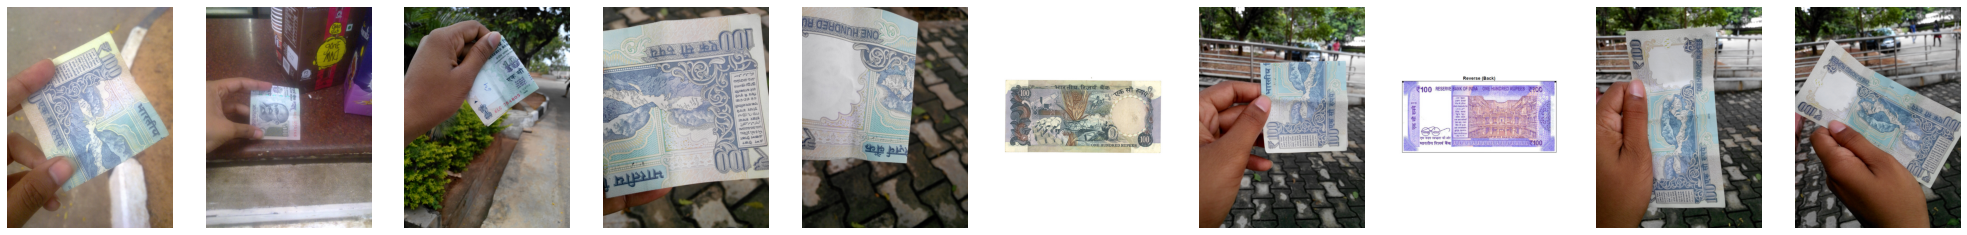

In [6]:
print("")
print("Trainned data for 100:")
print("")
Images_details(dir_name_train_100)
print("")
plot_images(dir_name_train_100, 10)


Trainned data for 200:

Images in:  dataset/training/200
total images:	500
min width:	117
max width:	4608
min height:	107
max height:	4608



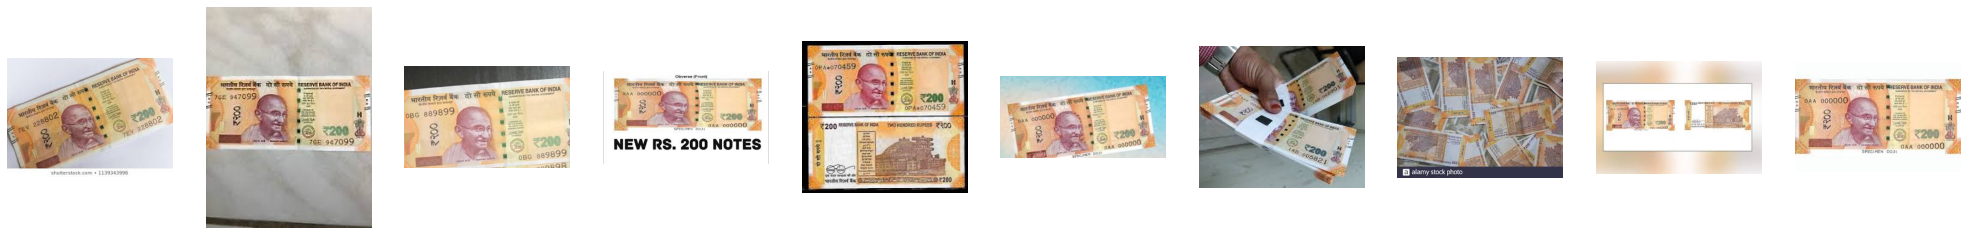

In [7]:
print("")
print("Trainned data for 200:")
print("")
Images_details(dir_name_train_200)
print("")
plot_images(dir_name_train_200, 10)

In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('dataset/training',target_size=(128,128),batch_size=32,class_mode='categorical')

Found 1400 images belonging to 3 classes.


In [10]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('dataset/validation',target_size=(128,128),batch_size=32,class_mode='categorical')

Found 135 images belonging to 3 classes.


In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 256)               32514304  
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 32,515,971
Trainable params: 32,515,971
Non-trainable params: 0
____________________________________________

In [12]:
mc = ModelCheckpoint('manual.h5', monitor = 'accuracy', verbose=1, save_best_only = True)

In [13]:
epochs = 10
batch_size = 32

In [15]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=[mc])

Epoch 1/10
43/43 [==============================] - ETA: 0s - loss: 1.0901 - accuracy: 0.3940
Epoch 1: accuracy improved from -inf to 0.39401, saving model to manual.h5
43/43 [==============================] - 40s 922ms/step - loss: 1.0901 - accuracy: 0.3940 - val_loss: 1.0920 - val_accuracy: 0.3906
Epoch 2/10
43/43 [==============================] - ETA: 0s - loss: 1.0634 - accuracy: 0.4605
Epoch 2: accuracy improved from 0.39401 to 0.46053, saving model to manual.h5
43/43 [==============================] - 39s 900ms/step - loss: 1.0634 - accuracy: 0.4605 - val_loss: 1.0524 - val_accuracy: 0.5156
Epoch 3/10
43/43 [==============================] - ETA: 0s - loss: 1.0434 - accuracy: 0.5051
Epoch 3: accuracy improved from 0.46053 to 0.50512, saving model to manual.h5
43/43 [==============================] - 38s 885ms/step - loss: 1.0434 - accuracy: 0.5051 - val_loss: 1.0258 - val_accuracy: 0.5625
Epoch 4/10
43/43 [==============================] - ETA: 0s - loss: 1.0179 - accuracy: 0.53

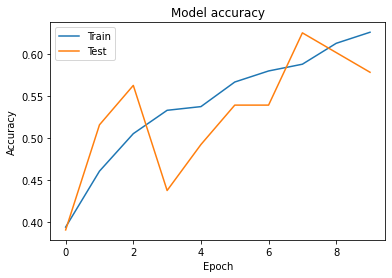

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

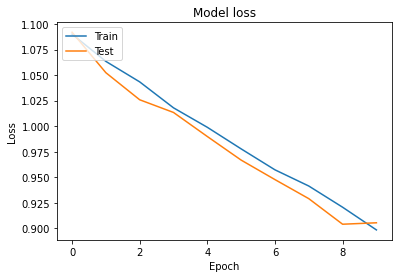

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()